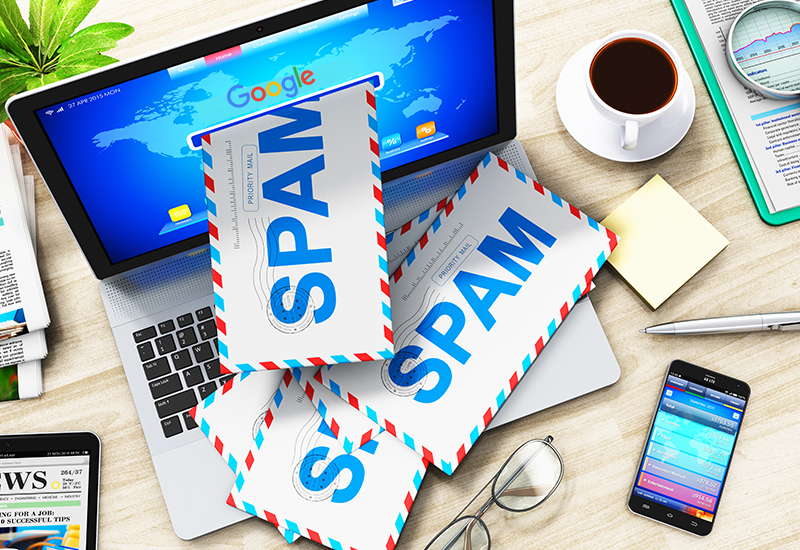

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spam = pd.read_csv('spam.csv')
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
spam.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
spam['label']=spam['Category'].apply(lambda x: 1 if x=='spam' else 0)
spam.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam.Message, spam.label, train_size=0.8, random_state=2)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [9]:
cv.fit(X_train)

CountVectorizer()

In [10]:
cv_train = cv.transform(X_train.values)
cv_test = cv.transform(X_test.values)
cv_test.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [12]:
mnb.fit(cv_train, y_train)

MultinomialNB()

In [13]:
email = ["UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available"]

In [14]:
emails_cv = cv.transform(email)
emails_cv

<1x7719 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [15]:
mnb.predict(emails_cv)

array([1], dtype=int64)

In [16]:
email1= ['SYMPTOMS when U are in love: "1.U like listening songs 2.U get stopped where u see the name of your beloved 3.U won\'t get angry when your']

In [17]:
emails_cv = cv.transform(email1)
emails_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
mnb.predict(emails_cv)

array([0], dtype=int64)

In [19]:
mnb.score(cv_test, y_test)

0.9739910313901345

In [20]:
y_predict = mnb.predict(cv_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       957
           1       0.96      0.85      0.90       158

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
import joblib
joblib.dump(cv, "CountVectorizer.pkl")
joblib.dump(mnb, "MultinomialNB.pkl")

['MultinomialNB.pkl']

# Pipeline

In [23]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('Mnb', MultinomialNB())
])

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('Mnb', MultinomialNB())])

In [25]:
pipe.score(X_test,y_test)

0.9739910313901345

In [26]:
y_pred = pipe.predict(X_test)

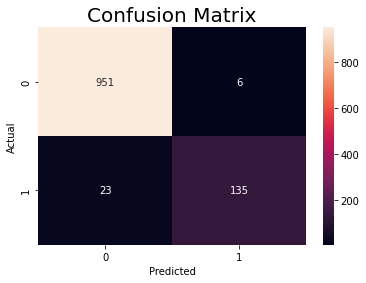

In [27]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
g=sns.heatmap(confusion_matrix, annot=True, fmt ='')
g.set_title('Confusion Matrix', fontsize = 20)
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       957
           1       0.96      0.85      0.90       158

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# New text_data

In [29]:
data = pd.read_csv('text_data.csv', encoding = "unicode_escape",index_col=[0])
data.head()

,Message_body,Label
S.No.,,
1,"UpgrdCentre Orange customer, you may now claim...",Spam
2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
3,Congrats! Nokia 3650 video camera phone is you...,Spam
4,URGENT! Your Mobile number has been awarded wi...,Spam
5,Someone has contacted our dating service and e...,Spam


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 1 to 125
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_body  125 non-null    object
 1   Label         125 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [31]:
data.groupby('Label').describe()

Message_body         \
                count unique   
Label                          
Non-Spam           49     49   
Spam               76     75   

                                                                  
                                                        top freq  
Label                                                             
Non-Spam                             Y de asking like this.    1  
Spam      Congratulations ur awarded 500 of CD vouchers ...    2

In [32]:
data['label']=data['Label'].apply(lambda x: 1 if x=='Spam' else 0)
data.head()

,Message_body,Label,label
S.No.,,,
1,"UpgrdCentre Orange customer, you may now claim...",Spam,1
2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,1
3,Congrats! Nokia 3650 video camera phone is you...,Spam,1
4,URGENT! Your Mobile number has been awarded wi...,Spam,1
5,Someone has contacted our dating service and e...,Spam,1


In [33]:
data.Message_body.values[0]

"UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available"

In [34]:
data['predicted'] = pipe.predict(data.Message_body.values)

In [35]:
data.head()

,Message_body,Label,label,predicted
S.No.,,,,
1,"UpgrdCentre Orange customer, you may now claim...",Spam,1,1
2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,1,1
3,Congrats! Nokia 3650 video camera phone is you...,Spam,1,1
4,URGENT! Your Mobile number has been awarded wi...,Spam,1,1
5,Someone has contacted our dating service and e...,Spam,1,1


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(data.label,data.predicted)

0.968

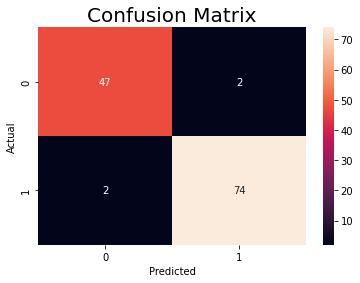

In [37]:
confusion_matrix = pd.crosstab(data.label,data.predicted, rownames=['Actual'], colnames=['Predicted'])
g=sns.heatmap(confusion_matrix, annot=True, fmt ='')
g.set_title('Confusion Matrix', fontsize = 20)
plt.show()

In [38]:
print(classification_report(data.label,data.predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.97      0.97      0.97        76

    accuracy                           0.97       125
   macro avg       0.97      0.97      0.97       125
weighted avg       0.97      0.97      0.97       125



In [39]:
import joblib

In [40]:
joblib.dump(pipe, "spam_mail.pkl")

['spam_mail.pkl']

In [41]:
loaded_vec = joblib.load(open("CountVectorizer.pkl","rb"))
loaded_vec.transform(email1)

<1x7719 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [42]:
clf = joblib.load(open('MultinomialNB.pkl',"rb"))

x = clf.predict(loaded_vec.transform(email1))
if x==0:
    print('Not Spam')
else :
    print('Spam')

Not Spam


In [43]:
from flask import Flask, render_template, request
app = Flask(__name__, 
            template_folder=r"E:\Machine-Learning-Projects\Naive_Bayes_Classifier\Email_Spam")
model = joblib.load(open('spam_mail.pkl',"rb"))

@app.route('/')
def Model():
    return render_template('Model.html')

@app.route('/result', methods = ['POST', 'GET'])
def result():
    '''
    For rendering results on HTML GUI
    '''
    prediction = model.predict(Massage)
    return render_template("Label.html",result=result) 

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)


In [44]:
from flask import Flask, render_template, request
app = Flask(__name__, 
            template_folder=r"E:\Machine-Learning-Projects\Naive_Bayes_Classifier")
model = joblib.load(open('MultinomialNB.pkl',"rb"))
loaded_vec = joblib.load(open("CountVectorizer.pkl","rb"))
@app.route('/')
def Model():
    return render_template('Model.html')

@app.route('/result', methods = ['POST', 'GET'])
def result():
    '''
    For rendering results on HTML GUI
    '''
    Massage = request.form['Data']
    cv = loaded_vec.transform(Massage)
    prediction = model.predict(cv)
    return render_template(result=result) 

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
